In [2]:
# 구글 인증 라이브러리 
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

# 수학 라이브러리
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

# 머신러닝 라이브러리
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

Authenticated


In [3]:
# 빅쿼리 관련 라이브러리 # 훈련데이터 불러오기
from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'kaggle-house'
client = bigquery.Client(project=project_id)

df_train = client.query('''
  SELECT 
      * 
  FROM `kaggle-house.kaggle_house_ver1.train`
  ''').to_dataframe()

df_train.shape

(1460, 81)

In [4]:
# 테스트 데이터 불러오기
df_test = client.query('''
  SELECT 
      * 
  FROM `kaggle-house.kaggle_house_ver1.test`
  ''').to_dataframe()

df_test.shape

(1459, 80)

In [5]:
pd.options.display.max_columns = None 
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,my1stFlrSF,my2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,my3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
def check(d):
  ndf = d.copy()
  ndf_na = (ndf.isnull().sum() / len(ndf)) * 100 # 100을 곱해주어 전체값을 보기쉽게 바꿔줌
  ndf_na.sort_values(ascending = False).reset_index(drop = True) #값들을 내림차순으로 정렬. 
  ndf_na = ndf_na.drop(ndf_na[ndf_na == 0].index).sort_values(ascending = False) # 0인값을 드롭, 내림차순으로 정렬
  # print(ndf_na)
  return ndf_na

check(df_train)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [7]:
## 질문

def f_m(df, cols, val):
  for col in cols:
    df[col] = df[col].fillna(val)

def f_m_w_m(df, cols):
  for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])

def addlog(res, cols):
  m = res.shape[1]
  for c in cols:
    res = res.assign(newcol = pd.Series(np.log(1.01+res[c])).values)
    res.columns.values[m] = c + '_log'
    m += 1
  return res

In [8]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['my1stFlrSF']  + df_train['my2ndFlrSF']

In [9]:
df_train['ex01'] = df_train['YearBuilt'] + df_train['YearRemodAdd'] + df_train['FullBath']

In [10]:
loglist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
            'TotalBsmtSF','my1stFlrSF','my2ndFlrSF','LowQualFinSF','GrLivArea',
            'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
            'EnclosedPorch','my3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']
df_train = addlog(df_train, loglist)

In [11]:
print(df_train["SalePrice"])

0       152000
1        79500
2       133000
3       260000
4       100000
         ...  
1455    140000
1456    168000
1457    228950
1458    131500
1459    129000
Name: SalePrice, Length: 1460, dtype: int64


In [12]:
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])
print(df_train["SalePrice"])

0       11.931642
1       11.283525
2       11.798112
3       12.468441
4       11.512935
          ...    
1455    11.849405
1456    12.031725
1457    12.341263
1458    11.786770
1459    11.767575
Name: SalePrice, Length: 1460, dtype: float64


In [13]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,my1stFlrSF,my2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,my3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,ex01,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,my1stFlrSF_log,my2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,BsmtFullBath_log,BsmtHalfBath_log,FullBath_log,HalfBath_log,BedroomAbvGr_log,KitchenAbvGr_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,my3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,YearRemodAdd_log,TotalSF_log
0,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,7,1926,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,TA,Mn,LwQ,370,Unf,0,779,1149,GasA,Gd,Y,FuseA,1149,467,0,1616,0,0,2,0,3,1,Gd,5,Typ,0,None,Detchd,1926.0,Unf,1,216,TA,TA,Y,0,0,183,0,0,0,None,None,None,0,10,2007,WD,Normal,11.931642,2765,3932,3.713816,8.594341,0.009950,5.916229,0.00995,6.659307,7.047526,7.047526,6.148490,0.009950,7.388334,0.009950,0.00995,1.101940,0.009950,1.388791,0.698135,1.793425,0.009950,0.698135,5.379943,0.009950,0.009950,5.21499,0.00995,0.00995,0.00995,0.009950,7.603404,7.925161
1,590,40,RM,50.0,9100,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,742,742,GasA,TA,Y,FuseA,779,0,156,935,0,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1988.0,Unf,1,308,TA,TA,P,0,0,0,0,0,0,None,None,Shed,600,8,2008,WD,Normal,11.283525,1521,3891,3.932022,9.116141,0.009950,0.009950,0.00995,6.610710,6.610710,6.659307,0.009950,5.056309,6.841626,0.009950,0.00995,0.698135,0.009950,1.101940,0.698135,1.611436,0.009950,0.698135,5.733374,0.009950,0.009950,0.00995,0.00995,0.00995,0.00995,6.398612,7.581215,7.327787
2,874,40,RL,60.0,12144,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1949,1950,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,Rec,375,Unf,0,457,832,GasA,Gd,Y,SBrkr,1036,0,232,1268,0,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1949.0,Unf,1,288,TA,TA,Y,0,28,0,0,0,0,None,None,Othr,0,9,2009,WD,Normal,11.798112,1868,3900,4.111038,9.404674,0.009950,5.929616,0.00995,6.126891,6.725046,6.944097,0.009950,5.451081,7.145992,0.009950,0.00995,0.698135,0.009950,1.388791,0.698135,1.947338,0.698135,0.698135,5.666461,0.009950,3.367641,0.00995,0.00995,0.00995,0.00995,0.009950,7.576102,7.533164
3,1271,40,RL,NaN,23595,Pave,None,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.0,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,12.468441,2856,3958,NaN,10.068833,0.009950,7.138081,0.00995,4.317621,7.195195,7.195195,5.262742,0.009950,7.329756,1.101940,0.00995,0.009950,0.698135,0.009950,0.698135,1.611436,0.698135,1.101940,6.375042,5.594749,0.009950,0.00995,0.00995,0.00995,0.00995,0.009950,7.590857,7.957531
4,1333,20,RL,67.0,8877,Pave,None,Reg,Lvl,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,4,6,1938,1958,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,690,Unf,0,126,816,GasA,Ex,Y,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,3,Typ,1,Gd,Detch

In [14]:
# 우선, 결측치가 있는 것 중, 범주형 데이터는 "None"으로 확인
f_m(df_train, ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
                        "GarageType", "GarageFinish", "GarageQual", "GarageCond",
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                       "MasVnrType", "MSSubClass"], "None") 

# 수치형 데이터는 0으로 보간
f_m(df_train, ["GarageYrBlt", "GarageArea", "GarageCars",
                       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                       "MasVnrArea"], 0)
# 그 중, 일부는 빈도수로 채워 넣는다.  
f_m_w_m(df_train, ["MSZoning", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"])
f_m(df_train, ["Functional"],"Typ")

In [15]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,my1stFlrSF,my2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,my3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,ex01,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,my1stFlrSF_log,my2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,BsmtFullBath_log,BsmtHalfBath_log,FullBath_log,HalfBath_log,BedroomAbvGr_log,KitchenAbvGr_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,my3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,YearRemodAdd_log,TotalSF_log
0,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,7,1926,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,TA,Mn,LwQ,370,Unf,0,779,1149,GasA,Gd,Y,FuseA,1149,467,0,1616,0,0,2,0,3,1,Gd,5,Typ,0,None,Detchd,1926.0,Unf,1,216,TA,TA,Y,0,0,183,0,0,0,None,None,None,0,10,2007,WD,Normal,11.931642,2765,3932,3.713816,8.594341,0.009950,5.916229,0.00995,6.659307,7.047526,7.047526,6.148490,0.009950,7.388334,0.009950,0.00995,1.101940,0.009950,1.388791,0.698135,1.793425,0.009950,0.698135,5.379943,0.009950,0.009950,5.21499,0.00995,0.00995,0.00995,0.009950,7.603404,7.925161
1,590,40,RM,50.0,9100,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,742,742,GasA,TA,Y,FuseA,779,0,156,935,0,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1988.0,Unf,1,308,TA,TA,P,0,0,0,0,0,0,None,None,Shed,600,8,2008,WD,Normal,11.283525,1521,3891,3.932022,9.116141,0.009950,0.009950,0.00995,6.610710,6.610710,6.659307,0.009950,5.056309,6.841626,0.009950,0.00995,0.698135,0.009950,1.101940,0.698135,1.611436,0.009950,0.698135,5.733374,0.009950,0.009950,0.00995,0.00995,0.00995,0.00995,6.398612,7.581215,7.327787
2,874,40,RL,60.0,12144,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1949,1950,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,Rec,375,Unf,0,457,832,GasA,Gd,Y,SBrkr,1036,0,232,1268,0,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1949.0,Unf,1,288,TA,TA,Y,0,28,0,0,0,0,None,None,Othr,0,9,2009,WD,Normal,11.798112,1868,3900,4.111038,9.404674,0.009950,5.929616,0.00995,6.126891,6.725046,6.944097,0.009950,5.451081,7.145992,0.009950,0.00995,0.698135,0.009950,1.388791,0.698135,1.947338,0.698135,0.698135,5.666461,0.009950,3.367641,0.00995,0.00995,0.00995,0.00995,0.009950,7.576102,7.533164
3,1271,40,RL,NaN,23595,Pave,None,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.0,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,12.468441,2856,3958,NaN,10.068833,0.009950,7.138081,0.00995,4.317621,7.195195,7.195195,5.262742,0.009950,7.329756,1.101940,0.00995,0.009950,0.698135,0.009950,0.698135,1.611436,0.698135,1.101940,6.375042,5.594749,0.009950,0.00995,0.00995,0.00995,0.00995,0.009950,7.590857,7.957531
4,1333,20,RL,67.0,8877,Pave,None,Reg,Lvl,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,4,6,1938,1958,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,690,Unf,0,126,816,GasA,Ex,Y,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,3,Typ,1,Gd,Detch

In [16]:
df_train.drop(['Utilities'], axis=1, inplace=True)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,my1stFlrSF,my2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,my3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,ex01,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,my1stFlrSF_log,my2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,BsmtFullBath_log,BsmtHalfBath_log,FullBath_log,HalfBath_log,BedroomAbvGr_log,KitchenAbvGr_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,my3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,YearRemodAdd_log,TotalSF_log
0,165,40,RM,40.0,5400,Pave,Pave,Reg,Lvl,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,7,1926,2004,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,TA,Mn,LwQ,370,Unf,0,779,1149,GasA,Gd,Y,FuseA,1149,467,0,1616,0,0,2,0,3,1,Gd,5,Typ,0,None,Detchd,1926.0,Unf,1,216,TA,TA,Y,0,0,183,0,0,0,None,None,None,0,10,2007,WD,Normal,11.931642,2765,3932,3.713816,8.594341,0.009950,5.916229,0.00995,6.659307,7.047526,7.047526,6.148490,0.009950,7.388334,0.009950,0.00995,1.101940,0.009950,1.388791,0.698135,1.793425,0.009950,0.698135,5.379943,0.009950,0.009950,5.21499,0.00995,0.00995,0.00995,0.009950,7.603404,7.925161
1,590,40,RM,50.0,9100,Pave,None,Reg,Lvl,Inside,Gtl,BrkSide,RRAn,Feedr,1Fam,1Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,742,742,GasA,TA,Y,FuseA,779,0,156,935,0,0,1,0,2,1,TA,4,Typ,0,None,Detchd,1988.0,Unf,1,308,TA,TA,P,0,0,0,0,0,0,None,None,Shed,600,8,2008,WD,Normal,11.283525,1521,3891,3.932022,9.116141,0.009950,0.009950,0.00995,6.610710,6.610710,6.659307,0.009950,5.056309,6.841626,0.009950,0.00995,0.698135,0.009950,1.101940,0.698135,1.611436,0.009950,0.698135,5.733374,0.009950,0.009950,0.00995,0.00995,0.00995,0.00995,6.398612,7.581215,7.327787
2,874,40,RL,60.0,12144,Pave,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1949,1950,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,Rec,375,Unf,0,457,832,GasA,Gd,Y,SBrkr,1036,0,232,1268,0,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1949.0,Unf,1,288,TA,TA,Y,0,28,0,0,0,0,None,None,Othr,0,9,2009,WD,Normal,11.798112,1868,3900,4.111038,9.404674,0.009950,5.929616,0.00995,6.126891,6.725046,6.944097,0.009950,5.451081,7.145992,0.009950,0.00995,0.698135,0.009950,1.388791,0.698135,1.947338,0.698135,0.698135,5.666461,0.009950,3.367641,0.00995,0.00995,0.00995,0.00995,0.009950,7.576102,7.533164
3,1271,40,RL,NaN,23595,Pave,None,Reg,Low,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.0,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,12.468441,2856,3958,NaN,10.068833,0.009950,7.138081,0.00995,4.317621,7.195195,7.195195,5.262742,0.009950,7.329756,1.101940,0.00995,0.009950,0.698135,0.009950,0.698135,1.611436,0.698135,1.101940,6.375042,5.594749,0.009950,0.00995,0.00995,0.00995,0.00995,0.009950,7.590857,7.957531
4,1333,20,RL,67.0,8877,Pave,None,Reg,Lvl,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,4,6,1938,1958,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,690,Unf,0,126,816,GasA,Ex,Y,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,3,Typ,1,Gd,Detchd,1958.0,Unf,1,288,Fa,Fa,Y,0,0,0,0,0,0,None,N

In [17]:
# import pandas as pd
# import matplotlib.pyplot as plt
# df_train

# ex1 = pd.DataFrame(df_train, columns= ['OverallQual','SalePrice','GrLivArea'])
# ex1 = df_train.plot.bar(grid = True)
# plt.show()


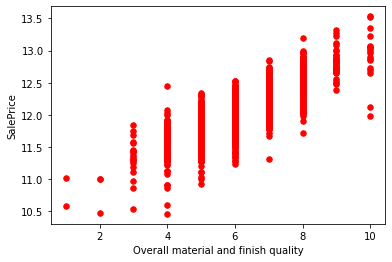

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
df_train

ex1 = pd.DataFrame(df_train, columns= ['OverallQual','SalePrice','GrLivArea'])
# ex1 = df_train.plot.hist()
plt.scatter(ex1['OverallQual'], ex1['SalePrice'], label = 'skitscat', color = 'r', s = 30, marker = 'o')
plt.xlabel('Overall material and finish quality')
plt.ylabel('SalePrice')
plt.show()


## 9번 패스, 

In [19]:
def fix_missing_cols(in_train, in_test):
    missing_cols = set(in_train.columns) - set(in_test.columns)
    # 테스트 데이터와 훈련 데이터의 컬럼을 동일하게 하는 코드는 작성한다. 
    for c in missing_cols:
        in_test[c] = 0
    # 순서를 동일하게 만든다. 
    in_test = in_test[in_train.columns]
    return in_test

def dummy_encode(in_df_train, in_df_test):
    df_train = in_df_train
    df_test = in_df_test
    categorical_feats = [
        f for f in df_train.columns if df_train[f].dtype == 'object'
    ]
    print(categorical_feats)
    for f_ in categorical_feats:
        prefix = f_
        df_train = pd.concat([df_train, pd.get_dummies(df_train[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = pd.concat([df_test, pd.get_dummies(df_test[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = fix_missing_cols(df_train, df_test)
    return df_train, df_test

In [20]:
df_train, df_test = dummy_encode(df_train, df_test)
print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Shape train: (1460, 334), test: (1459, 334)


In [21]:
y = df_train["SalePrice"]
y.sample(3)

687     11.648339
92      11.884496
1287    12.688502
Name: SalePrice, dtype: float64

In [22]:
df_train.drop(["SalePrice"], axis=1, inplace=True)
df_test.drop(["SalePrice"], axis=1, inplace=True)

print("Shape train: %s, test: %s" % (df_train.shape, df_test.shape))

Shape train: (1460, 333), test: (1459, 333)


# 새 섹션

In [23]:
X_train, X_test, y_train, y_test = train_test_split( df_train, y, test_size=0.2, random_state=42)

In [24]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'dart',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 7,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [25]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [26]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=1000)

[1]	valid_0's l2: 0.152626	valid_0's l1: 0.310098	valid_0's auc: 1
[2]	valid_0's l2: 0.13042	valid_0's l1: 0.284603	valid_0's auc: 1
[3]	valid_0's l2: 0.112213	valid_0's l1: 0.260455	valid_0's auc: 1
[4]	valid_0's l2: 0.097176	valid_0's l1: 0.239491	valid_0's auc: 1
[5]	valid_0's l2: 0.0850082	valid_0's l1: 0.221709	valid_0's auc: 1
[6]	valid_0's l2: 0.0753016	valid_0's l1: 0.206103	valid_0's auc: 1
[7]	valid_0's l2: 0.0671776	valid_0's l1: 0.191783	valid_0's auc: 1
[8]	valid_0's l2: 0.0713425	valid_0's l1: 0.199141	valid_0's auc: 1
[9]	valid_0's l2: 0.0635201	valid_0's l1: 0.185315	valid_0's auc: 1
[10]	valid_0's l2: 0.0575744	valid_0's l1: 0.173533	valid_0's auc: 1
[11]	valid_0's l2: 0.051833	valid_0's l1: 0.162265	valid_0's auc: 1
[12]	valid_0's l2: 0.0541474	valid_0's l1: 0.167068	valid_0's auc: 1


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[95002]	valid_0's l2: 0.0180843	valid_0's l1: 0.0864127	valid_0's auc: 1
[95003]	valid_0's l2: 0.0180848	valid_0's l1: 0.0864063	valid_0's auc: 1
[95004]	valid_0's l2: 0.0180852	valid_0's l1: 0.0864007	valid_0's auc: 1
[95005]	valid_0's l2: 0.0180858	valid_0's l1: 0.0863959	valid_0's auc: 1
[95006]	valid_0's l2: 0.0180854	valid_0's l1: 0.0864016	valid_0's auc: 1
[95007]	valid_0's l2: 0.0180851	valid_0's l1: 0.0864065	valid_0's auc: 1
[95008]	valid_0's l2: 0.0180857	valid_0's l1: 0.0864014	valid_0's auc: 1
[95009]	valid_0's l2: 0.0180854	valid_0's l1: 0.0864053	valid_0's auc: 1
[95010]	valid_0's l2: 0.0180852	valid_0's l1: 0.0864085	valid_0's auc: 1
[95011]	valid_0's l2: 0.0180856	valid_0's l1: 0.0864029	valid_0's auc: 1
[95012]	valid_0's l2: 0.0180861	valid_0's l1: 0.0863978	valid_0's auc: 1
[95013]	valid_0's l2: 0.0180864	valid_0's l1: 0.0863926	valid_0's auc: 1
[95014]	valid_0's l2: 0.0180868	valid_0's l1: 0.0863887	valid_0's auc: 1
[95015]	valid_0

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='dart',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.1, max_bin=512,
              max_depth=7, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [27]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

The rmse of prediction is: 0.00011


In [28]:
test_pred = np.expm1(gbm.predict(df_test, num_iteration=gbm.best_iteration_))
df_test["SalePrice"] = test_pred
df_test.to_csv("results.csv", columns=["Id", "SalePrice"], index=False)